## Capture of sub-micron volcanic ash particles in a shallow conduit via turbophoresis and sintering
***

### Jamie I. Farquharson[*](#linkhandle), Hugh Tuffen, Fabian B. Wadsworth, Jonathan M. Castro, Holly Unwin, C. Ian Schipper 



<a id="linkhandle"></a>* [ifarq89@googlemail.com](mailto:jifarq89@googlemail.com)

### Abstract
**Ash emission in explosive silicic eruptions can have widespread impacts for human health, agriculture, infrastructure, and aviation. Estimates of the total grainsize distribution (TGSD) generated during explosive magma fragmentation underpins eruption models and ash dispersal forecasts. Conventionally, the TGSD constrained via erupted deposits is assumed to match the TGSD produced at explosive fragmentation. Here we present observations from within the vent of a recent rhyolitic eruption (Cordón Caulle, Chile, 2011–2012), demonstrating that (<63 $\mu$m diameter) and ultra-fine (<2.5 $\mu$m diameter) ash particles are captured and sintered to fracture surfaces, and thus sequestered in the shallow subsurface, rather than emitted. We establish a conceptual model—uniquely contextualised through a combination of syn-eruptive observations and detailed post-eruption field investigation—in which turbophoresis (particle migration towards zones of lower turbulence) and rapid sintering create an inverse relationship between particle size and the probability of its subsurface capture. Such size-dependent capture efficiency preferentially removes submicron-diameter ash from the erupted componentry, decoupling the erupted size distribution from magmatic source conditions and potentially playing an important role in modulating eruption dynamics.**
***

In [1]:
# '''
# Import packages
# '''
import numpy as np

import glob

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
import matplotlib.ticker as ticker
from matplotlib.ticker import LogFormatterExponent
import matplotlib.patches as mpatches
from matplotlib.patches import Polygon
import matplotlib.image as mpimg
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

import datetime as dt

import pandas as pd

from scipy import stats, optimize
from scipy.stats import lognorm
import scipy

import math

from sklearn.linear_model import LinearRegression

print("All packages imported")

All packages imported


In [2]:
'''
Function converts mm input to inches (for plotting figures the correct size).
'''

def mm2inch(*tupl):
    if isinstance(tupl[0], tuple):
        return tuple(k*0.0393701 for k in tupl[0])
    else:
        return tuple(k*0.0393701 for k in tupl)

In [3]:
def plt_params_sans():
    plt.rcParams['text.usetex'] = True
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = ['Computer Modern Sans serif']
    plt.rcParams["mathtext.fontset"] = "cm"
    params = {'text.latex.preamble' : [r'\usepackage{amsmath}', r'\usepackage{amssymb}',r'\usepackage{siunitx}']}
    plt.rcParams.update(params)


In [4]:
def call_plt_params():
    matplotlib.rcParams['text.usetex'] = True 
    matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
    matplotlib.rcParams['font.family'] = 'sans-serif'
    matplotlib.rcParams['font.sans-serif'] = 'cm'
    plt.rcParams["font.family"] = 'sans-serif'

In [5]:
'''
For formatting logarithmic axis labels
'''
class LogFormatterTexTextMode(LogFormatterExponent):
    def __call__(self, x, pos=None):
        x = LogFormatterExponent.__call__(self, x,pos)
        s = r"10\textsuperscript{{{}}}".format(x)
        return s

#### Plume height data collected by El Servicio Nacional de Geología y Minería (SERNAGEOMIN) and Observatorio Volcanológico de los Andes del Sur (OVDAS): see 	Silva Parejas, C., Lara, L. E., Bertin, D., Amigo, A. & Orozco, G. The 2011-2012 eruption of Cordón Caulle volcano (Southern Andes): Evolution, crisis management and current hazards. 9382 (2012).
***

In [6]:
plume_height = pd.read_csv("data/plume_height.csv") ## read in data
dates = []
for num in plume_height["Days since start"].values: ## convert "Days since start" to date
    date = dt.datetime(2011,6,4) + dt.timedelta(days = int(num))
    dates.append(date)
    
plume_height["date"] = dates 

plume_height.head()

,Days since start,Plume height km,date
0,0,14.0,2011-06-04
1,1,NaN,2011-06-05
2,2,NaN,2011-06-06
3,3,NaN,2011-06-07
4,4,7.5,2011-06-08


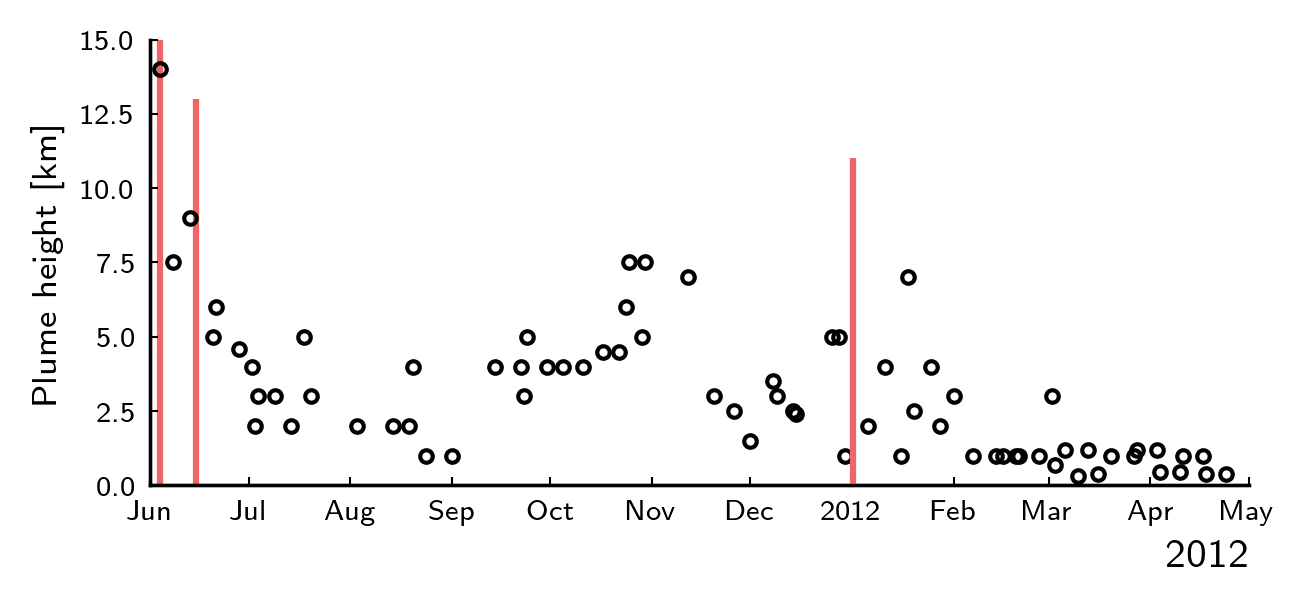

In [7]:
plt_params_sans()
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   #
       r'\sisetup{detect-all}',   # 
       r'\usepackage{sansmath}',  # 
       r'\sansmath'               # 
]
fig = plt.figure(1, mm2inch(120,50), dpi=300)
ax = fig.add_subplot(111)
ax.plot(plume_height["date"],plume_height["Plume height km"], marker = "o", lw=0,
        ms = 3, mfc ="none", mec="k",
       zorder = 999)


ax0 = ax.twiny()
ax0.plot(plume_height["Days since start"],plume_height["Plume height km"], marker = "", lw=0, clip_on=False)
ax0.vlines(x=212.5, ymin = 0, ymax = 11, color = '#EE6666',)

ax.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)

locator = mdates.AutoDateLocator(minticks=4, maxticks=12)
formatter = mdates.ConciseDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax0.set_xticks([])
for axis in [ax,ax0]:
    for spine in ["top", "right"]:
        axis.spines[spine].set_visible(False)
        
ax.set_ylabel("Plume height [km]", fontsize = "small")
ax.set_ylim(0,15)
ax.vlines(x=dt.datetime(2011,6,4), ymin = 0, ymax = 15, color = '#EE6666',zorder =0)
ax.vlines(x=dt.datetime(2011,6,15), ymin = 0, ymax = 13, color = '#EE6666',zorder =0)
ax.set_xlim(xmin=pd.Timestamp("2011-06-01"),
            xmax=pd.Timestamp("2012-05-01"))

#plt.savefig("fig-plume-height.pdf", bbox_inches = "tight")
plt.show()

**Figure 1 Syn- and post-eruption observations at Cordón Caulle.** Plume height above sea level over time, from onset in July 2011 until May 2012 (see ref. 26). Onset of effusion (i.e. hybrid phase) is highlighted, as is the date of on-site observations shown in c–e.
***

(Panels c-e not shown in this notebook)

#### Import particle size distribution data of this study

In [8]:
''' Import size distribution of nozzle particles '''
size_data = pd.read_csv("data/AN1_sizedist.csv")
size_data["meters"] = size_data["microns"]*0.000001
size_data["log"] = np.log10(size_data.meters)
size_data["vol"] = (4/3)*np.pi*(size_data.meters/2)**3
rho = 2407.3
size_data["mass"] = rho*size_data["vol"]

sorted_df = size_data.sort_values("meters")
total_mass = sum(sorted_df["mass"])

In [9]:
new_data = pd.read_csv("data/_sizedist.csv")
new_data.head()

,CCTVAIP x4300,AN2 4000x,AN2 4300x,CCVP_02 4300x,CCVP_03 4300x,CCVP_04 4300x,CCVP_05 4300x,CCVP_06 4300x,CC1960 4300x,CC1960 3700x
0,0.121,0.532,0.215,0.512,0.672,1.032,0.283,1.117,0.530,0.828
1,0.782,0.668,0.621,0.342,1.484,1.591,0.346,5.792,1.861,1.248
2,1.115,0.357,0.383,0.461,0.241,0.513,2.312,0.667,0.786,0.409
3,0.356,0.239,0.587,0.199,0.494,0.617,0.326,0.593,1.002,0.553
4,0.513,0.549,0.611,0.375,0.262,0.568,0.330,0.219,0.499,0.529


In [10]:
for i in list(new_data):
    new_data["{}_meters".format(i)] = new_data[i]*0.000001

In [11]:
''' Compile PSD information from same samples '''

supersets = ["CCVP","CCTVAIP", "AN2"]
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
super_dfs = [df1, df2, df3]

compiled_data = pd.DataFrame()
for i,s in enumerate(supersets):

    tmp = []
    for k,dataset in enumerate(list(new_data)):

        if s in dataset and "_meters" in dataset:

            tmp.extend(new_data[dataset].dropna().values)
    super_dfs[i]["{}".format(s)] = tmp
compiled_data = pd.concat([df1, df2, df3], axis=1)
compiled_data["AN1"] = size_data.meters

tmp = pd.DataFrame()
tmp_list = []
for sample in list(compiled_data):
    tmp_list.extend(compiled_data[sample].values)
tmp["All"] = tmp_list
compiled_data = pd.concat([compiled_data, tmp], axis=1)
compiled_data.head()

,CCVP,CCTVAIP,AN2,AN1,All
0,5.120000e-07,1.210000e-07,5.320000e-07,6.772487e-07,5.120000e-07
1,3.420000e-07,7.820000e-07,6.680000e-07,4.021164e-07,3.420000e-07
2,4.610000e-07,1.115000e-06,3.570000e-07,9.523810e-07,4.610000e-07
3,1.990000e-07,3.560000e-07,2.390000e-07,7.830688e-07,1.990000e-07
4,3.750000e-07,5.130000e-07,5.490000e-07,6.772487e-07,3.750000e-07


In [12]:
''' PSD information for 1960 data '''

CC1960_data = pd.DataFrame()

tmp = []
for k,dataset in enumerate(list(new_data)):

    if "CC1960" in dataset and "_meters" in dataset:

        tmp.extend(new_data[dataset].dropna().values)

CC1960_data["CC1960"] = tmp

CC1960_data.head()

,CC1960
0,5.300000e-07
1,1.861000e-06
2,7.860000e-07
3,1.002000e-06
4,4.990000e-07


In [13]:
'''
To identify value of array closest to a given value 
'''
def find_nearest(array, value, index = False):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    if not index == True:
        return array[idx]
    else:
        return array[idx], idx

#### Plot size distribution data of this study: cumulative distribution, with inset showing mass proportion assuming spherical particles of equal density.

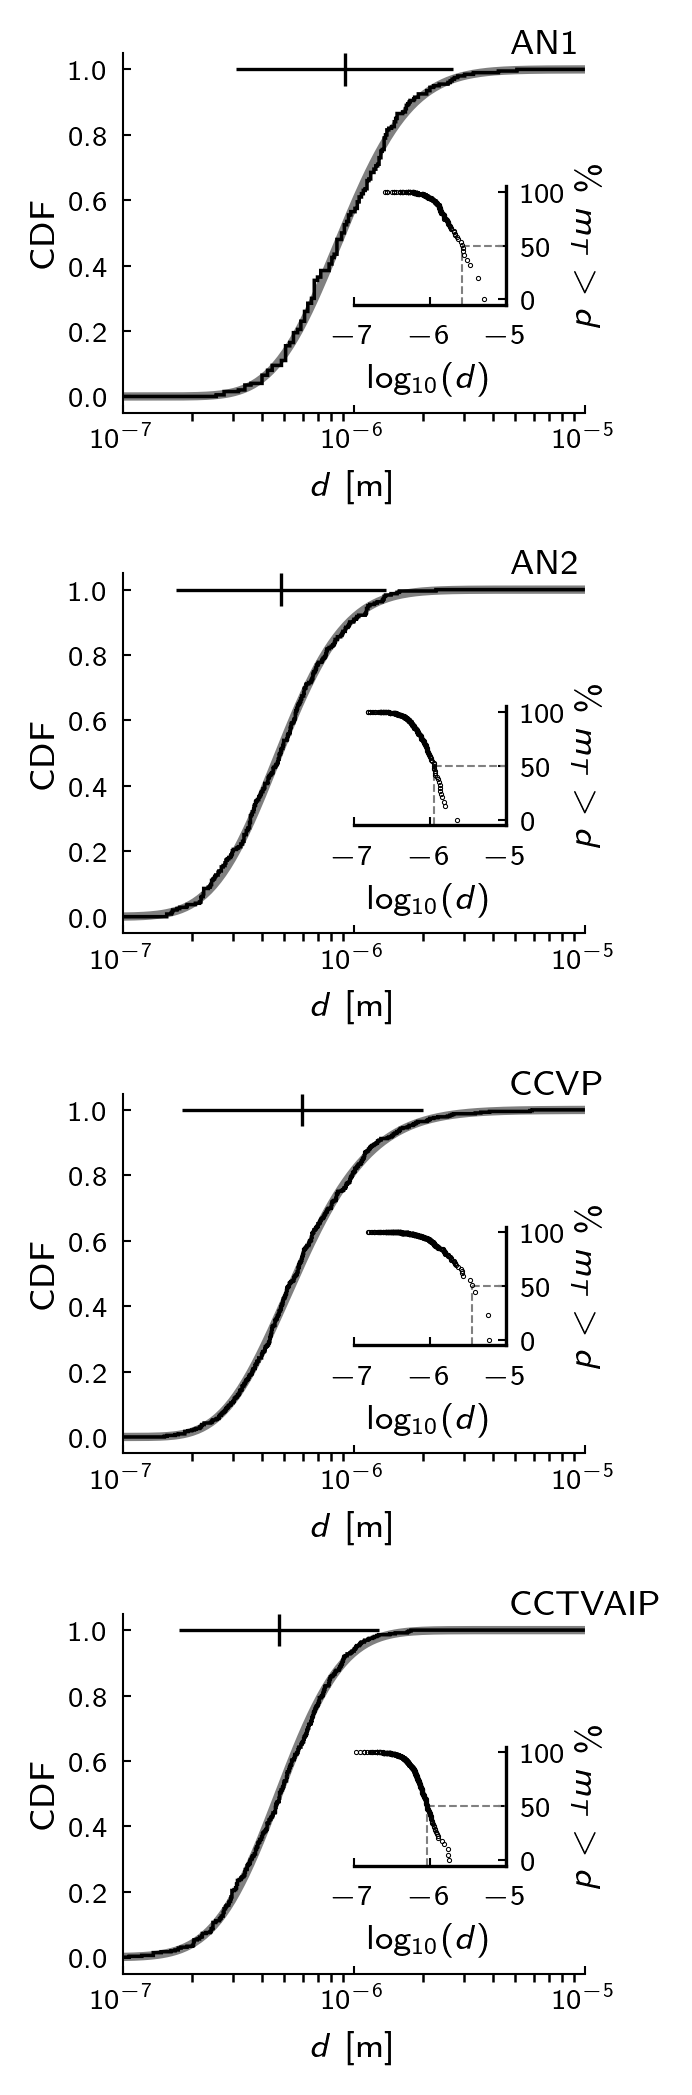

In [14]:
plt_params_sans()
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   #
       r'\sisetup{detect-all}',   # 
       r'\usepackage{sansmath}',  # 
       r'\sansmath'               # 
]

fig = plt.figure(1, figsize = (mm2inch(60,180)), dpi = 300)

locmaj = ticker.LogLocator(base=10,numticks=12) ## set up logarithmic axis options
locmin = ticker.LogLocator(base=10.0,subs=(np.arange(0.1,1,0.1)),numticks=12)


axs = [fig.add_subplot(411),
      fig.add_subplot(412),
      fig.add_subplot(413),
      fig.add_subplot(414)]

samples = ["AN1", "AN2", "CCVP", "CCTVAIP"]
for i, ax in enumerate(axs):
    sample = samples[i]
    series = compiled_data[sample].dropna()
    log10_data = [np.log10(x) for x in series.values]
    log10mean = np.mean(log10_data)
    mean = 10**log10mean
    log10std = np.std(log10_data)
    vals = [10**(log10mean+x*log10std) for x in [-2,-1,1,2]]

    ax.hlines(y=1, xmin=vals[0], xmax=vals[3],
                  color = "k", lw =.8)
    ax.vlines(x = mean, ymin = 0.95, ymax = 1.05,
              color = "k", lw =0.8)
    
    
    for spine in ["top", "bottom", "left", "right"]:
        ax.spines[spine].set_linewidth(.5)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    ax.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
    n, bins, patches = ax.hist(series.values, bins = np.geomspace(1e-7, 1e-5,1000),
             cumulative = True, density = True, histtype = "step", lw = .85, color= "k",#"#EE6666",
    #                           label = "data"
                               )
    patches[0].set_xy(patches[0].get_xy()[:-1])
    ax.set_xscale("log")
    ax.set_ylabel("CDF", fontsize = "small", labelpad=2)
    ax.set_xlabel(r"$d$ [m]", fontsize = "small")
    ax.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
    ax.set_xlim(1e-7, 1e-5)
    ax.set_xticks([1e-7, 1e-6,1e-5])
    ax.set_ylim(-0.05, 1.05)

    ####
    ####
    log_data = [np.log(x) for x in series.values]
    param = lognorm.fit(log_data)
    x = np.linspace(np.log(1e-7), np.log(1e-5), 200)
    cdf_fitted = stats.lognorm.cdf(x, *param)
    ax.plot(np.exp(x), cdf_fitted, lw=2,ls = "-" ,
            label="lognormal", zorder = 0, color = "grey")
    
    inset = ax.inset_axes([0.5, 0.3, 0.33, 0.33])


    vol = (4/3)*np.pi*(series.values/2)**3

    mass = rho*vol
    sorted_series = sorted(series.values)
    log_data = np.log10(sorted_series)
    total_mass_ = np.nansum(mass)
    inset.plot(log_data, 100-(np.cumsum(sorted(mass))/total_mass_*100),# color= col, lw = 0.8, alpha = 0.8)
               marker = ".", lw = 0, ms = 2, mec = "k", mfc = "None", mew = 0.25)

    inset.set_xlim(-7,-5)
    inset.set_ylim(-5, 105)
    inset.set_ylabel(r"\% $m_T > d$", fontsize = "small", rotation  = 270, labelpad = 8)
    inset.set_xlabel(r"log$_{10}$($d$)", fontsize = "small")
    inset.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
    
    val, ix = find_nearest(100-(np.cumsum(sorted(mass))/total_mass_*100), 50, index = True)
    
    
    inset.hlines(y = 50, xmin = log_data[ix], xmax = -5, lw = .5, ls = "--", color = "grey")
    inset.vlines(x = log_data[ix], ymin = -5, ymax=50, lw = .5, ls = "--", color = "grey")
    inset.set_yticks([0,50,100])
    inset.yaxis.tick_right()
    inset.yaxis.set_label_position("right")
    inset.spines["top"].set_visible(False)
    inset.spines["left"].set_visible(False)
    inset.set_facecolor("none")

    l1 = ax.plot([],[], ls = "-", color = "k", label = r"data", lw = 1)
    l3 = ax.plot([],[], lw = 0, marker = "+",mew=.5,ms = 49, 
                  mec = "k", color = "k", label = r"$\langle x\rangle \pm 2\sigma$")


    ax.annotate(sample, fontsize = "small", xy = (0.84, 1.), xycoords = "axes fraction")
# plt.savefig("fig2_{}.pdf".format(sample), bbox_inches = 'tight')
plt.tight_layout()


#### Import EDX data and plot spectra.

In [15]:
''' Read in EDX data from files '''
spectra_path = glob.glob("data/EDX_reports")
spectra_CCVAIP = glob.glob(spectra_path[0]+"/site 5*")
spectra_CCVP = glob.glob(spectra_path[0]+"/site 4*")

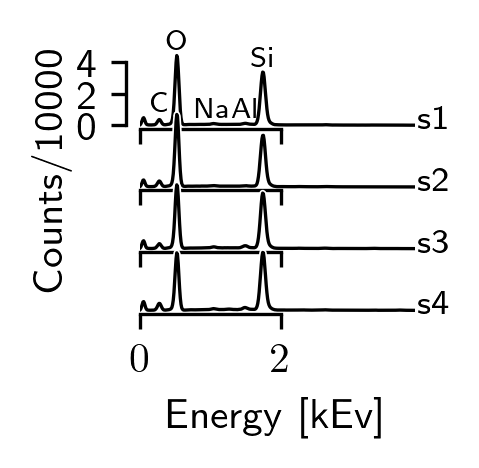

In [16]:
 '''
CCVP substrate
'''

fig = plt.figure(1, figsize=(mm2inch(30,30)), frameon=True, dpi=300)
plt_params_sans()

gs = plt.GridSpec(4, 1, figure=fig, wspace=0.25, hspace=-.25
                 )
axs = [       
       fig.add_subplot((gs[0,0])),
       fig.add_subplot((gs[1,0])),
       fig.add_subplot((gs[2,0])),
       fig.add_subplot((gs[3,0])),
     ]



# ################# bgn panel d ###################
CCVP_spectra_df = pd.DataFrame()
m = 0
offset = 0
for j,file in enumerate(sorted(spectra_CCVP)[2:6]):
    tmp = pd.read_csv(file, skiprows=20, sep = ",", names = ["spectrum", "data"],error_bad_lines=False)
    sp_list = []
    for i,s in enumerate(tmp["spectrum"]):
        try:
            sp_list.append((float(s), tmp["data"][i]))
        except:
            continue
    axs[m].plot([x[0] for x in sp_list], [x[1]/1e4 for x in sp_list], lw =1.6, color = "w", alpha = 1)
    axs[m].plot([x[0] for x in sp_list], [x[1]/1e4 for x in sp_list], lw =.8, color = "k", alpha = 1)
    axs[m].set_xlim(0,3.9)
    axs[m].set_ylim(-0.2,5)
    axs[m].spines["right"].set_visible(False)
    axs[m].spines["top"].set_visible(False)
    axs[m].spines["left"].set_visible(False)
    axs[m].spines["left"].set_position(("axes", (offset-.05)))
    axs[m].spines["bottom"].set_bounds(0,2)
    axs[m].tick_params(labelbottom=False)
    axs[m].tick_params(labelleft=False) 
    axs[m].tick_params(left= False)
    axs[m].set_facecolor("None")
    axs[m].annotate("s"+str(j+1), xy = (1.01,0), xycoords = "axes fraction", fontsize = "small")
    m+=1 
    offset+=.1
#
for i in ([0]):
    axs[i].set_yticks([0,2,4]) 
    axs[i].tick_params(left= True)
    axs[i].tick_params(labelleft=True)
    axs[i].set_ylabel("Counts/10000")# labelpad=-15)
    axs[i].spines["left"].set_visible(True)
    axs[i].set_yticklabels([0,2,4]) 
    axs[i].spines["left"].set_bounds(0,4)
    for j,n in enumerate([0.277, 0.525, 1.487, 1.740 ,1.041]):# 0.703]):
        xyt = (7,12) if i == 6 else (0,0)
        style = dict(arrowstyle="->",
                                lw=0.5, shrinkA=0, shrinkB=0.1,\
                    connectionstyle = "angle,angleA=10,angleB=-90,rad=5") if i == 6 else None #bar,angle=180,fraction=-0.2
        axs[i].annotate(["C","O", "Al", "Si", "Na", "K", "Fe"][j],
                    xy = (n, [.9,4.8,.5,3.7,.5,.5, 0.2][j]), fontsize = "x-small", xycoords = "data",
                    ha= "center",
                   xytext = xyt, textcoords = "offset points", 
                   arrowprops=style)
for i in [-1]:
    axs[i].tick_params(labelbottom=True)
    axs[i].set_xlabel("Energy [kEv]")
    axs[i].tick_params(bottom= True)

axs[0].yaxis.set_label_coords(-0.25,-0.5)
axs[0].xaxis.set_label_coords(-1,0)

# plt.savefig("fig_chemistry2.pdf", bbox_inches = 'tight')
plt.show()


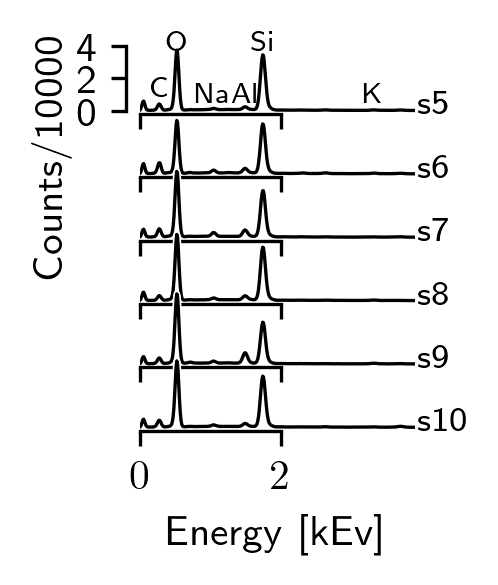

In [17]:
 '''
CCVP substrate
'''

fig = plt.figure(1, figsize=(mm2inch(30,45)), frameon=True, dpi=300)
plt_params_sans()

gs = plt.GridSpec(6, 1, figure=fig, wspace=0.25, hspace=-.25
                 )
axs = [       
       fig.add_subplot((gs[0,0])),
       fig.add_subplot((gs[1,0])),
       fig.add_subplot((gs[2,0])),
       fig.add_subplot((gs[3,0])),
       fig.add_subplot((gs[4,0])),
       fig.add_subplot((gs[5,0])),
      ]



# ################# bgn panel d ###################
CCVP_spectra_df = pd.DataFrame()
m = 0
offset = 0
for j,file in enumerate(list(set(sorted(spectra_CCVP)) - set(sorted(spectra_CCVP)[2:6]))):#[0:4]):
    tmp = pd.read_csv(file, skiprows=20, sep = ",", names = ["spectrum", "data"],error_bad_lines=False)
    sp_list = []
    for i,s in enumerate(tmp["spectrum"]):
        try:
            sp_list.append((float(s), tmp["data"][i]))
        except:
            continue
    axs[m].plot([x[0] for x in sp_list], [x[1]/1e4 for x in sp_list], lw =1.6, color = "w", alpha = 1)
    axs[m].plot([x[0] for x in sp_list], [x[1]/1e4 for x in sp_list], lw =.8, color = "k", alpha = 1)
    axs[m].set_xlim(0,3.9)
    axs[m].set_ylim(-0.2,5)
    axs[m].spines["right"].set_visible(False)
    axs[m].spines["top"].set_visible(False)
    axs[m].spines["left"].set_visible(False)
    axs[m].spines["left"].set_position(("axes", (offset-.05)))
    axs[m].spines["bottom"].set_bounds(0,2)
    axs[m].tick_params(labelbottom=False)
    axs[m].tick_params(labelleft=False) 
    axs[m].tick_params(left= False)
    axs[m].set_facecolor("None")
    axs[m].annotate("s"+str(j+5), xy = (1.01,0), xycoords = "axes fraction", fontsize = "small")
    m+=1 
    offset+=.1

for i in ([0]):
    axs[i].set_yticks([0,2,4]) 
    axs[i].tick_params(left= True)
    axs[i].tick_params(labelleft=True)
    axs[i].set_ylabel("Counts/10000")# labelpad=-15)
    axs[i].spines["left"].set_visible(True)
    axs[i].set_yticklabels([0,2,4]) 
    axs[i].spines["left"].set_bounds(0,4)
    for j,n in enumerate([0.277, 0.525, 1.487, 1.740 ,1.041, 3.314,]):# 0.703]):
        xyt = (7,12) if i == 6 else (0,0)
        style = dict(arrowstyle="->",
                                lw=0.5, shrinkA=0, shrinkB=0.1,\
                    connectionstyle = "angle,angleA=10,angleB=-90,rad=5") if i == 6 else None #bar,angle=180,fraction=-0.2
        axs[i].annotate(["C","O", "Al", "Si", "Na", "K", "Fe"][j],
                    xy = (n, [.9,3.7,.5,3.7,.5,.5, 0.2][j]), fontsize = "x-small", xycoords = "data",
                    ha= "center",
                   xytext = xyt, textcoords = "offset points", 
                   arrowprops=style)
for i in [-1]:
    axs[i].tick_params(labelbottom=True)
    axs[i].set_xlabel("Energy [kEv]")
    axs[i].tick_params(bottom= True)

axs[0].yaxis.set_label_coords(-0.25,-0.5)
axs[0].xaxis.set_label_coords(-1,0)

# plt.savefig("fig_chemistry1.pdf", bbox_inches = 'tight')
plt.show()


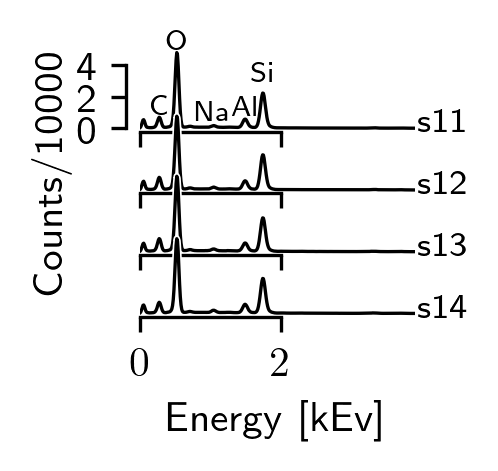

In [18]:
 '''
CCVP substrate
'''

fig = plt.figure(1, figsize=(mm2inch(30,30)), frameon=True, dpi=300)
plt_params_sans()

gs = plt.GridSpec(4, 1, figure=fig, wspace=0.25, hspace=-.25
                 )
axs = [       
       fig.add_subplot((gs[0,0])),
       fig.add_subplot((gs[1,0])),
       fig.add_subplot((gs[2,0])),
       fig.add_subplot((gs[3,0])),
      ]



# ################# bgn panel d ###################
m = 0
offset = 0
for j, file in enumerate(sorted(spectra_CCVAIP)[0:4]):
    tmp = pd.read_csv(file, skiprows=20, sep = ",", names = ["spectrum", "data"],error_bad_lines=False)
    sp_list = []
    for i,s in enumerate(tmp["spectrum"]):
        try:
            sp_list.append((float(s), tmp["data"][i]))
        except:
            continue
    axs[m].plot([x[0] for x in sp_list], [x[1]/1e4 for x in sp_list], lw =1.6, color = "w", alpha = 1)
    axs[m].plot([x[0] for x in sp_list], [x[1]/1e4 for x in sp_list], lw =.8, color = "k", alpha = 1)
    axs[m].set_xlim(0,3.9)
    axs[m].set_ylim(-0.2,5)
    axs[m].spines["right"].set_visible(False)
    axs[m].spines["top"].set_visible(False)
    axs[m].spines["left"].set_visible(False)
    axs[m].spines["left"].set_position(("axes", (offset-.05)))
    axs[m].spines["bottom"].set_bounds(0,2)
    axs[m].tick_params(labelbottom=False)
    axs[m].tick_params(labelleft=False) 
    axs[m].tick_params(left= False)
    axs[m].set_facecolor("None")
    axs[m].annotate("s"+str(j+11), xy = (1.01,0), xycoords = "axes fraction", fontsize = "small")
    m+=1 
    offset+=.1
#
for i in ([0]):
    axs[i].set_yticks([0,2,4]) 
    axs[i].tick_params(left= True)
    axs[i].tick_params(labelleft=True)
    axs[i].set_ylabel("Counts/10000")# labelpad=-15)
    axs[i].spines["left"].set_visible(True)
    axs[i].set_yticklabels([0,2,4]) 
    axs[i].spines["left"].set_bounds(0,4)
    for j,n in enumerate([0.277, 0.525, 1.487, 1.740 ,1.041]):# 0.703]):
        xyt = (7,12) if i == 6 else (0,0)
        style = dict(arrowstyle="->",
                                lw=0.5, shrinkA=0, shrinkB=0.1,\
                    connectionstyle = "angle,angleA=10,angleB=-90,rad=5") if i == 6 else None #bar,angle=180,fraction=-0.2
        axs[i].annotate(["C","O", "Al", "Si", "Na", "K", "Fe"][j],
                    xy = (n, [.9,5,.8,3.,.5,.5, 0.2][j]), fontsize = "x-small", xycoords = "data",
                    ha= "center",
                   xytext = xyt, textcoords = "offset points", 
                   arrowprops=style)
for i in [-1]:
    axs[i].tick_params(labelbottom=True)
    axs[i].set_xlabel("Energy [kEv]")
    axs[i].tick_params(bottom= True)
axs[0].yaxis.set_label_coords(-0.25,-0.5)
# plt.savefig("fig_chemistry3.pdf", bbox_inches = 'tight')
plt.show()


**Figure 3 Point EDX analyses for sample CCVP**, with spectra for points s1–s4 (the substrate) shown in e, and points s5–s10 (discrete particles) in f. Peaks for C, O, Na, Al, Si, and K are highlighted. Spectra for points s11–s14 are shown in h.
***

#### The following cells define and execute the viscosity model of Giordano et al.* These functions have been adapted from the script written by Orya Chevrel ([@oryalava](https://github.com/oryalava)), available [here](https://github.com/oryalava/Silicate_melt_viscosity_models).

 [*] Giordano, D., Russell, J.K. and Dingwell, D.B., 2008. Viscosity of magmatic liquids: a model. Earth and Planetary Science Letters, 271(1-4), pp.123-134.

In [19]:
''' GRD models '''

def convert_to_mole(normalised_element_list):

    """ This function converts the normalised oxides weigh percent into
    mole percent that is used for the silicate melt viscosity model"""

    converted_element_list = []
    molar_mass = {
        'SiO2': 60.0843,
        'TiO2': 79.8658,
        'Al2O3': 101.961276,
        'Fe2O3': 159.69,
        'FeO': 71.8444,
        'MnO': 70.937449,
        'MgO': 40.3044,
        'CaO': 56.0774,
        'Na2O': 61.97894,
        'K2O': 94.196,
        'P2O5': 141.9446,
        'H2O': 18.01528,
        'F2O_1': 37.9968}

    mole_SiO2 = normalised_element_list[0] / molar_mass['SiO2']
    converted_element_list.append(mole_SiO2)

    mole_TiO2 = normalised_element_list[1] / molar_mass['TiO2']
    converted_element_list.append(mole_TiO2)

    mole_Al2O3 = normalised_element_list[2] / molar_mass['Al2O3']
    converted_element_list.append(mole_Al2O3)

    mole_FeOtot = normalised_element_list[3]/ molar_mass['FeO']
    converted_element_list.append(mole_FeOtot)

    mole_MnO = normalised_element_list[4] / molar_mass['MnO']
    converted_element_list.append(mole_MnO)

    mole_MgO = normalised_element_list[5] / molar_mass['MgO']
    converted_element_list.append(mole_MgO)

    mole_CaO = normalised_element_list[6] / molar_mass['CaO']
    converted_element_list.append(mole_CaO)

    mole_Na2O = normalised_element_list[7] / molar_mass['Na2O']
    converted_element_list.append(mole_Na2O)

    mole_K2O = normalised_element_list[8] / molar_mass['K2O']
    converted_element_list.append(mole_K2O)

    mole_P2O5 = normalised_element_list[9] / molar_mass['P2O5']
    converted_element_list.append(mole_P2O5)

    mole_H2O =normalised_element_list[10] / molar_mass['H2O']
    converted_element_list.append(mole_H2O)

    mole_F2O_1 = normalised_element_list[11] / molar_mass['F2O_1']
    converted_element_list.append(mole_F2O_1)

    # return the created list with mole
    return converted_element_list

In [20]:
def compute_melt_viscosity_GRD08(return_data=False, T = 750):

    """ This function calculates the parameters of the non-Arrheanian VFT equation using the model
    of Giordano et al. 2008:
    log viscosity(Pa.s) = A + B / (T(K) - C),
    where A is a constant independent of composition and B and C are adjustable parameters
    Input data
    -----------
    json file containing the silicate melt chemical composition in oxide wt. %
    Returns
    ------------
    B and C of the VFT equation
    Tg: the glass transition temperature at viscosity = e12 Pa.s
    Reference
    ---------
    Giordano, D., Russell, J. K., & Dingwell, D. B. (2008). Viscosity of magmatic liquids: a model.
    Earth and Planetary Science Letters, 271(1), 123-134.
    """
    # convert Fe2O3 in FeO and compute FeOtot
    temperature = T
    wt_FeOtot = wt_Fe2O3 * ((2. * 71.8444) / 159.688) + wt_FeO

    element_list = [wt_SiO2, wt_TiO2, wt_Al2O3, wt_FeOtot, wt_MnO, wt_MgO, wt_CaO, wt_Na2O, wt_K2O, wt_P2O5]

    # normalize values (weight normalised = wtn)
    sum_all_element = 0.
    for i in range(0, len(element_list)):
        sum_all_element += element_list[i]

    wtn_SiO2 = wt_SiO2 * (100. - wt_H2O) / (sum_all_element + wt_F2O_1)
    wtn_TiO2 = wt_TiO2 * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_Al2O3 = wt_Al2O3 * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_FeOtot = wt_FeOtot * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_MnO = wt_MnO * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_MgO = wt_MgO * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_CaO = wt_CaO * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_Na2O = wt_Na2O * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_K2O = wt_K2O * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_P2O5 = wt_P2O5 * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)
    wtn_F2O_1 = wt_F2O_1 * (100. - wt_H2O) / (sum_all_element+wt_F2O_1)

    normalised_element_list = [wtn_SiO2, wtn_TiO2, wtn_Al2O3, wtn_FeOtot, wtn_MnO, wtn_MgO, wtn_CaO, wtn_Na2O, wtn_K2O,
                               wtn_P2O5, wt_H2O, wtn_F2O_1]

    sum_normalised_element_list=0
    for i in range(0, len(normalised_element_list)):
        sum_normalised_element_list += normalised_element_list[i]
    print('normalise sum element list',sum_normalised_element_list)

    # convert in mole:
    element_list_in_mole = convert_to_mole(normalised_element_list)

    # normalize values and obtains mole fractions : mf_
    sum_all_element_in_mole = 0.
    for i in range(0, len(element_list_in_mole)):
        sum_all_element_in_mole += element_list_in_mole[i]
    print('GFW = ', 100./sum_all_element_in_mole)

    mf_SiO2 = element_list_in_mole[0] * 100. / sum_all_element_in_mole
    mf_TiO2 = element_list_in_mole[1] * 100. / sum_all_element_in_mole
    mf_Al2O3 = element_list_in_mole[2] * 100. / sum_all_element_in_mole
    mf_FeOtot = element_list_in_mole[3] * 100. / sum_all_element_in_mole
    mf_MnO = element_list_in_mole[4] * 100. / sum_all_element_in_mole
    mf_MgO = element_list_in_mole[5] * 100. / sum_all_element_in_mole
    mf_CaO = element_list_in_mole[6] * 100. / sum_all_element_in_mole
    mf_Na2O = element_list_in_mole[7] * 100. / sum_all_element_in_mole
    mf_K2O = element_list_in_mole[8] * 100. / sum_all_element_in_mole
    mf_P2O5 = element_list_in_mole[9] * 100. / sum_all_element_in_mole
    mf_H2O = element_list_in_mole[10] * 100. / sum_all_element_in_mole
    mf_F2O_1 = element_list_in_mole[11] * 100. / sum_all_element_in_mole
    mol_oxide_basis = [mf_SiO2, mf_TiO2, mf_Al2O3, mf_FeOtot, mf_MnO, mf_MgO, mf_CaO, mf_Na2O, mf_K2O,
                               mf_P2O5, mf_H2O, mf_F2O_1]
    # fitting parameters:
    B1 = 159.560
    B2 = -173.340
    B3 = 72.130
    B4 = 75.690
    B5 = -38.980
    B6 = -84.080
    B7 = 141.540
    B11 = -2.43
    B12 = -0.91
    B13 = 17.62

    C1 = 2.75
    C2 = 15.720
    C3 = 8.320
    C4 = 10.20
    C5 = -12.290
    C6 = -99.540
    C11 = 0.300

    # calculate VFT paramters
    A = -4.55

    B = (mf_SiO2 + mf_TiO2) * B1 + \
        mf_Al2O3 * B2 + \
        (mf_FeOtot + mf_MnO + mf_P2O5) * B3 + \
        mf_MgO * B4 + \
        mf_CaO * B5 + \
        (mf_Na2O + mf_H2O + mf_F2O_1) * B6 + \
        ((mf_H2O + mf_F2O_1) + np.log(1. + mf_H2O)) * B7 + \
        (mf_SiO2 + mf_TiO2) * (mf_FeOtot + mf_MnO + mf_MgO) * B11 + \
        (mf_SiO2 + mf_TiO2 + mf_Al2O3 + mf_P2O5) * (mf_Na2O + mf_K2O + mf_H2O) * B12 + \
        mf_Al2O3 * (mf_Na2O + mf_K2O) * B13

    C = mf_SiO2 * C1 + \
        (mf_TiO2 + mf_Al2O3) * C2 + \
        (mf_FeOtot + mf_MnO + mf_MgO) * C3 + \
        mf_CaO * C4 + \
        (mf_Na2O + mf_K2O) * C5 + \
        np.log(1. + mf_H2O) * C6 + \
        (mf_Al2O3 + mf_FeOtot + mf_MnO + mf_MgO + mf_CaO - mf_P2O5) * (mf_Na2O + mf_K2O + mf_H2O) * C11
    Tg = B / (12 - A) + C
    logviscosity_liquid_GRD08 = A + B / (temperature + 273.15 - C)
    viscosity_liquid_GRD08 = 10**logviscosity_liquid_GRD08

    inverse_temperature = []
    logviscosity_GRD = []

    for temp in range(300, 1100):
        logvisco_GRD = A + B/ (temp + 273.15 - C)
        inverse_temperature.append(10000.0 / (temp + 273.15))
        logviscosity_GRD.append(logvisco_GRD)

    if return_data == True:
        return inverse_temperature, logviscosity_GRD, viscosity_liquid_GRD08
    else:
        fig1 = plt.figure()
        fig1 = fig1.add_subplot(111)
        fig1.plot(inverse_temperature, logviscosity_GRD, '-', color='r', label='GRD model')
        fig1.legend(loc=1, prop={'size': 8})
        fig1.set_xlabel("10000 / T (K)")
        fig1.set_ylabel("log viscosity (Pa.s)")
        plt.show()
        return viscosity_liquid_GRD08

In [21]:
''' Cordon Caulle composition'''
temperature = 900

wt_SiO2 = 70.3
wt_TiO2 = 0.62
wt_Al2O3 =14.1
wt_FeO = 3.57
wt_Fe2O3 = 0.0 ##
wt_MnO = 0.149
wt_MgO = 0.541
wt_CaO = 1.79
wt_Na2O = 3.59
wt_K2O = 2.79
wt_P2O5 = 0.1
wt_H2O = 0.1
wt_F2O_1 = 0.0

In [22]:
''' Compute viscosity for later calculations '''
invT, logV, V = compute_melt_viscosity_GRD08(return_data = True, T = 900)

normalise sum element list 100.00000000000001
GFW =  64.80144478905527


In [23]:
''' Variables used for calculations. Refer to manuscript for sources and discussion. '''
mu = V
# a = 1e-4 ## in range [0.1,100] µm 
rho = 2407.3 # density in kg m-3 based on rhyolite at 825 degC
Gamma = 0.36 # surface tension 
u = 100# velocity m s-1 based on image velocimetry
Ginf = 1e10 # bulk modulus at infinity
g = 9.80665 # acceleration due to gravity
muG = 4.65e-5 ## dynamic viscosity of air at 825 degC

In [24]:
compiled_data_all = []
for i in list(new_data):
    if "_meters" in i:
        if "CCVP" in i:
            compiled_data_all.extend(list(new_data[i].values))

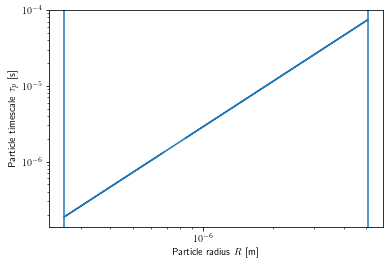

In [25]:
''' Calculate particle time constant '''
# grainsizes = [x/2 for x in compiled_data_all]
grainsizes = size_data.meters.values
tau_p = [(rho*(a)**2)/(18*muG) for a in grainsizes]
plt.plot(grainsizes, tau_p)

plt.yscale("log")
plt.xscale("log")
plt.xlabel("Particle radius $R$ [m]")
plt.ylabel(r"Particle timescale $\tau_p$ [s]")

plt.axvline(max(grainsizes))
plt.axvline(min(grainsizes))

In [26]:
''' Calculate the Eulerian (system-scale) Reynolds number '''
L = 0.01 # Fracture width
U = 100 # Velocity
nuG = 1.382e-4 ## kinematic viscosity of air at 825 degC
rhoG = 0.3213 ## density of air at 825 degC


muG_X = muG*(1+(5/2)*0.2) ## 0.2 particle fraction
### https://wiki.anton-paar.com/uk-en/the-influence-of-particles-on-suspension-rheology/

ReE = (rhoG*U*L)/muG_X
ReE_ = (U*L)/nuG
print("Eulerian Reynolds number: {:.2e}".format( ReE)),\
print("Eulerian Reynolds number: {:.2e}".format( ReE_)),
# print(ReE > 2900, ReE_ > 2900)
print("Flow is turbulent") if ReE > 2900 else print("Flow is not turbulent")

Eulerian Reynolds number: 4.61e+03
Eulerian Reynolds number: 7.24e+03
Flow is turbulent


In [27]:
''' calculate Kolmogorov lengthscales '''
KoL = [(nuG)/U for U in [.01,.1,1,10,100]]

''' calculate Kolmogorov timescales '''
dissipation = [(nuG**3)/(k**4) for k in KoL]
tau_eta = [(nuG/E)**.5 for E in dissipation]

In [28]:
''' Fracture aperture halfwidth '''
tau_f = [0.01/U for U in [0.01,.1,1,10,100]]

In [29]:
St1_val_eta = []
St1_val_f = []

x = np.array(grainsizes).reshape((-1, 1))
lx = [np.log10(x) for x in x]
St1 = np.array(np.log10(1)).reshape(-1, 1)

for i in range(len(tau_eta)):
    t_eta0 = tau_eta[i]
    t_f0 = tau_f[i]
    t_p0 = [(rho*(2*R)**2)/(18*muG) for R in grainsizes]

    St_eta0 = [t/t_eta0 for t in t_p0]
    St_f0 = [t/t_f0 for t in t_p0]
    
    y = np.array(St_eta0).reshape((-1, 1))
    ly = [np.log10(y) for y in y]
    model = LinearRegression().fit(ly,lx)
    St1_val_eta.append(10**model.predict(St1)[0][0])
    
    y = np.array(St_f0).reshape((-1, 1))
    ly = [np.log10(y) for y in y]
    model = LinearRegression().fit(ly,lx)
    St1_val_f.append(10**model.predict(St1)[0][0])

In [30]:
''' Calculate Stokes numbers '''
St1_val_eta = []
St1_val_f = []

x = np.array(grainsizes).reshape((-1, 1))
lx = [np.log10(x) for x in x]
St1 = np.array(np.log10(1)).reshape(-1, 1)

for i in range(len(tau_eta)):
    t_eta0 = tau_eta[i]
    t_f0 = tau_f[i]
    t_p0 = [(rho*(2*R)**2)/(18*muG) for R in grainsizes]

    St_eta0 = [t/t_eta0 for t in t_p0]
    St_f0 = [t/t_f0 for t in t_p0]
    
    y = np.array(St_eta0).reshape((-1, 1))
    ly = [np.log10(y) for y in y]
    model = LinearRegression().fit(ly,lx)
    St1_val_eta.append(10**model.predict(St1)[0][0])
    
    y = np.array(St_f0).reshape((-1, 1))
    ly = [np.log10(y) for y in y]
    model = LinearRegression().fit(ly,lx)
    St1_val_f.append(10**model.predict(St1)[0][0])

In [31]:
''' To compute Weber numbers '''
def Webers(u):
    u =u 
    Wes1 = []
    Wes_1 = []
    for a in size_data.meters.values:
        We = (rho*(a/2)*u**2)/Gamma
        Wes1.append(We)
        Wes_1.append((rho*(a/2)*u**2)/0.078)
    return Wes1, Wes_1

In [32]:
''' Computation of Ohnesorge numbers '''
Ohs = []
for a in size_data.meters.values:
    Oh = mu/(np.sqrt((a/2)*rho*Gamma))
    Ohs.append(Oh)
print("min: {:.2e}; max: {:.2e}".format(min(Ohs), max(Ohs)))


min: 3.31e+09; max: 1.48e+10


In [33]:
''' Simple linear regression function '''
def lin_regress(x, y):
    ''' Logs data to return linear model in log-log space '''
    x = np.array(x).reshape((-1, 1))
    lx = [np.log10(x) for x in x]
    y = np.array(y).reshape((-1, 1))
    ly = [np.log10(y) for y in y]
    model = LinearRegression().fit(lx,ly)
    return model

In [34]:
''' For calculation the intersection of the lines passing through a2,a1 and b2,b1 '''
def get_intersect(a1, a2, b1, b2):
    """ 
    Returns the point of intersection of the lines passing through a2,a1 and b2,b1.
    a1: [x, y] a point on the first line
    a2: [x, y] another point on the first line
    b1: [x, y] a point on the second line
    b2: [x, y] another point on the second line
    """
    s = np.vstack([a1,a2,b1,b2])        # s for stacked
    h = np.hstack((s, np.ones((4, 1)))) # h for homogeneous
    l1 = np.cross(h[0], h[1])           # get first line
    l2 = np.cross(h[2], h[3])           # get second line
    x, y, z = np.cross(l1, l2)          # point of intersection
    if z == 0:                          # lines are parallel
        return (float('inf'), float('inf'))
    return (x/z, y/z)

In [35]:
''' Calculte lines for plotting '''
a1 = (np.log10(.01),np.log10(St1_val_eta[0]))
a2 = (np.log10(100),np.log10(St1_val_eta[-1]))

b1 = (np.log10(.01),np.log10(St1_val_f[0]))
b2 = (np.log10(100),np.log10(St1_val_f[-1]))

#### Plot Stokes regimes in velocity-radius space, alongside data on the Weber-Ohnesorge plane

In [36]:
''' Weber '''

u = 100
Wes = []
Wes_ = []
# Ohs = []
# for u in [1,10,100]:
# for a in size_data.meters.values:
for a in compiled_data["All"].values:
    We = (rho*(a/2)*u**2)/Gamma
    Wes.append(We)
    Wes_.append((rho*(a/2)*u**2)/0.078)
#         Oh = mu/(np.sqrt((a/2)*rho*Gamma))
#         Ohs.append(Oh)
print(min(Wes), max(Wes))

x1 = min(Ohs)
x2 = max(Ohs)
y1 = max(Wes)
y2 = max(Wes_)
y3 = min(Wes)
y4 = min(Wes_)

poly_coords = [
    (x1, y2), (x2, y2),
    (x2, y4), (x1, y3)
]

3.5775152777777777 197.76638194444445


In [38]:
fig = plt.figure(1, figsize=(mm2inch(90,60)), dpi = 300)
plt_params_sans()

################################################

################################################
gs = plt.GridSpec(3, 2, figure=fig, #wspace=0.25, hspace=0.5
                 )
ax0 = fig.add_subplot((gs[0,0]))
ax =  fig.add_subplot((gs[1::,0]))
ax1 = ax.twinx()
ax2 = fig.add_subplot((gs[1::,1]))

for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_linewidth(.5)
    ax2.spines[spine].set_linewidth(.5)
    ax0.spines[spine].set_visible(False)
    ax1.spines[spine].set_visible(False)
ax0.spines["left"].set_visible(True)
ax0.spines["left"].set_linewidth(.5)
################################################

################################################



ax0.hist(compiled_data["All"]/2, bins = np.geomspace(np.nanmin(compiled_data["All"]/2), 
                                                 np.nanmax(compiled_data["All"]/2), 30),#bins = np.geomspace(1e-7, 1e-5,30),
         cumulative = False, density = False, histtype = "stepfilled",
        color='grey', clip_on=False, label = "_nolabel", alpha = 0.5)
ax0.hist(compiled_data["All"]/2, bins = np.geomspace(np.nanmin(compiled_data["All"]/2), 
                                                 np.nanmax(compiled_data["All"]/2), 30),#bins = np.geomspace(1e-7, 1e-5,30),
         cumulative = False, density = False, histtype = "step",
        color='k', clip_on=False, label = "All", alpha = 1, lw=0.5)

colors = ["#2271B2", "#e69f00", "#359B73", "#d55e00"]
for i, sample in enumerate(list(compiled_data)[0:4]):
    ax0.hist(compiled_data[sample]/2, bins = np.geomspace(np.nanmin(compiled_data["All"]/2), 
                                                 np.nanmax(compiled_data["All"]/2), 30),#bins = np.geomspace(1e-7, 1e-5,30),
         cumulative = False, density = False, histtype = "step",color = colors[i],#roma_map(255/(i+1)),
         clip_on=False, alpha = 0.85, label = sample, lw=0.5)
    
    dataset = compiled_data[sample].values[~np.isnan(compiled_data[sample].values)]
    log10_data = [np.log10(x) for x in dataset/2]
    log10mean = np.mean(log10_data)
    mean = 10**log10mean
    log10std = np.std(log10_data)
    vals = [10**(log10mean+x*log10std) for x in [-2,-1,1,2]]
    ax0.hlines(y=145+(5*i), xmin=vals[0], xmax=vals[3],
                  color = colors[i], lw =.5)
    ax0.vlines(x = mean, ymin = 135+(5*i), ymax = 155+(5*i),
              color = colors[i], lw =.5)    
    
ax0.legend(fontsize = "xx-small",
          edgecolor ="none",markerscale = 0.1,  loc = "upper left", 
          handlelength = 0.7,handletextpad = 0.3,columnspacing=-1,
          bbox_to_anchor=(0.45,1.1), 
           ncol=2
          )
ax0.set_xscale("log")
ax0.set_xlim(.9e-8, 5e-3)
ax0.set_ylim(ymin=0, ymax = 200)#22)
ax0.set_xticks([])
ax0.set_ylabel(r"$f$ [count]", fontsize = "small")
ax0.set_yticks([0,100,200])
################################################

################################################
ax.set_ylabel(r"$\langle u\rangle$ [m s$^{-1}$]", fontsize = "small")
ax.set_xlabel(r"$R$ [m]", fontsize = "small")

x0,y0 = get_intersect(a1,a2,b1,b2)

v1 = [10**a2[1], 10**a2[0]]
v2 = [10**b2[1], 10**b2[0]]
v3 = [10**y0,10**x0]
poly = Polygon([v1,v2,v3],closed=True, color = "w",
                     edgecolor = "k", lw=.5, zorder = 0, ls = ":")
poly.set_edgecolor("k")
ax.add_patch(poly)
ax.set_ylim(1e-3,1e2)
ax.set_xlim(.9e-8, 5e-3)
ax.set_facecolor("lightgrey")
ax.set_yscale("log")
ax.set_xscale("log")
m =  lin_regress(St1_val_f,[.01,.1,1,10,100]) ## Get laminar flow curve
dummy_x = np.array([np.log10(x) for x in np.geomspace(1e-6,1e-3,20)]).reshape((-1, 1))
dummy_y = m.predict(dummy_x)
ax.plot(10**dummy_x, 10**dummy_y, lw = .5, ls = "-", color = "k")
################################################

################################################
ax0.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax1.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax1.set_ylim(1e-3,1e2)
ax1.set_yscale("log")

ax.annotate(r"St $<$ 1", xy = (1e-7, 1e-1),xycoords="data", fontsize = "x-small")
ax.annotate(r"St $>$ 1", xy = (1e-5, 2e1),xycoords="data", fontsize = "x-small")

dataset = compiled_data.All.values[~np.isnan(compiled_data.All.values)]
log10_data = [np.log10(x) for x in dataset/2]
log10mean = np.mean(log10_data)
mean = 10**log10mean
log10std = np.std(log10_data)
vals = [10**(log10mean+x*log10std) for x in [-2,-1,1,2]]
ax0.hlines(y=181, xmin=vals[0], xmax=vals[3],
              color = "k", lw =.5)
ax0.vlines(x = mean, ymin = 171, ymax = 191,
          color = "k", lw =.5)

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:.0f}'.format(x))
ax0.yaxis.set_major_formatter(ticks_y)
# locmaj = ticker.LogLocator(base=10,numticks=12) ## set up logarithmic axis options
# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(np.arange(0.1,1,0.1)),numticks=12)
ax.yaxis.set_major_formatter(LogFormatterTexTextMode())
ax.yaxis.set_major_locator(locmaj)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.xaxis.set_major_formatter(LogFormatterTexTextMode())
ax.xaxis.set_major_locator(locmaj)
ax.set_yticks([1e-2, 1e0, 1e2])
ax.set_xticks([1e-7, 1e-5, 1e-3])

l1 = ax.plot([],[], ls = ":", color = "k", label = r"St = $\lambda_p/\lambda_K$", lw = .5)
l2 = ax.plot([],[], ls = "-", color = "k", label = r"St = $\lambda_p/\lambda_O$", lw = .5)


Z = np.arange(1,10001,10)
WeZ = Z**2


ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.axhline(1, lw= .5, color="k", ls="--")
ax2.vlines(x = 1, ymin= 1e-10, ymax = 1, lw= .5, color="k", ls="--")
ax2.plot(Z, WeZ, lw= .5, color="k", ls="--")

ax2.set_xlabel(r"Oh", fontsize = "small")

ax2.set_ylim(1e-3, 1e8)
ax2.set_xlim(1e-3, 1e12)



for u in [10, 100]:
    Wes, *_ = Webers(u)
    x1 = min(Ohs)
    x2 = max(Ohs)
    if u == 10:
        y1 = max(Wes)
        y3 = min(Wes)
    else:
        y2 = max(Wes)
        y4 = min(Wes)

    poly_coords = [
        (x1, y2), (x2, y4),
        (x2, y3), (x1, y1)
    ]

    ax2.add_patch(
        plt.Polygon(poly_coords,ec = "k",lw=.5,color = "grey",
                    alpha = 0.8, zorder = 999)
        )
    
ax2.yaxis.tick_right()
ax2.annotate('IV', xy = (0.6,0.7), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")
ax2.annotate('I', xy = (0.05,0.7), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")
ax2.annotate('II', xy = (0.05,0.1), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")
ax2.annotate('III', xy = (0.6,0.1), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")

ax2.yaxis.set_major_formatter(LogFormatterTexTextMode())
ax2.yaxis.set_major_locator(locmaj)
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())

ax2.xaxis.set_major_formatter(LogFormatterTexTextMode())
ax2.xaxis.set_major_locator(locmaj)
ax2.set_xticks([1e0,1e4, 1e8])
ax2.set_yticks([1e0,1e4, 1e8])
ax2.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel(r"We", fontsize = "small", rotation = 270, labelpad = 8)

ax1.set_yticks([])

ax.legend(fontsize = "xx-small",
          edgecolor ="none", loc = "lower left", markerscale = 0.1,facecolor = "none",
          handlelength = 1,#handletextpad = 0.3,
          bbox_to_anchor=(.45,0.96))
# plt.savefig("fig4_revised.pdf", bbox_inches = "tight")
plt.clf()

<Figure size 1062.99x708.662 with 0 Axes>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


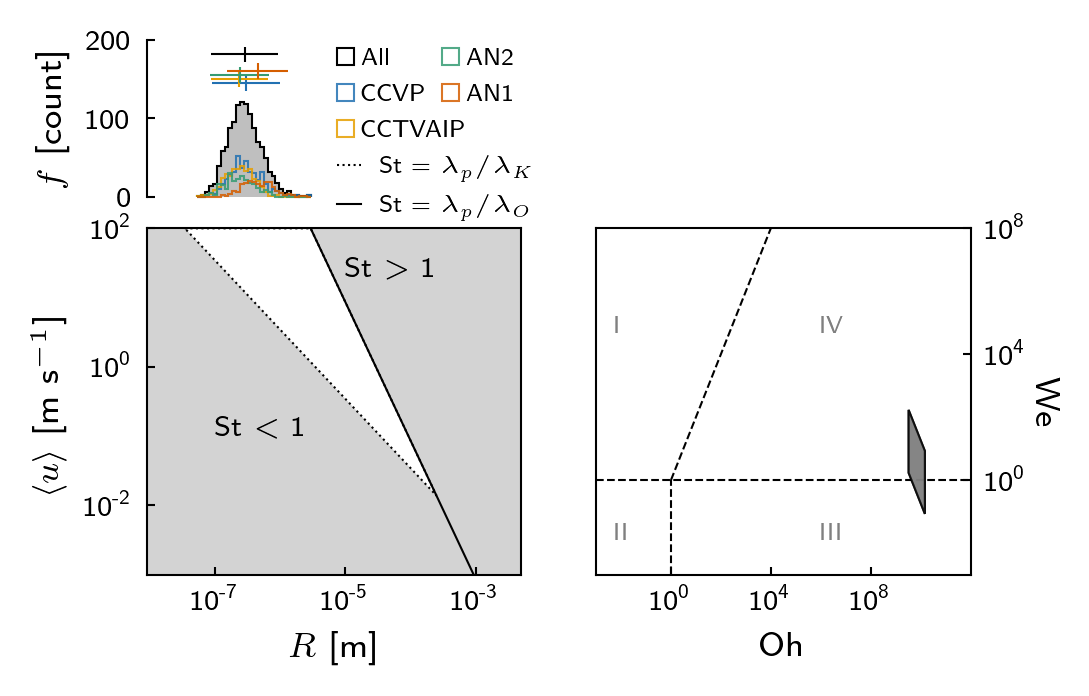

In [39]:
fig = plt.figure(1, figsize=(mm2inch(90,60)), dpi = 300)
plt_params_sans()

################################################

################################################
gs = plt.GridSpec(3, 2, figure=fig, #wspace=0.25, hspace=0.5
                 )
ax0 = fig.add_subplot((gs[0,0]))
ax =  fig.add_subplot((gs[1::,0]))
ax1 = ax.twinx()
ax2 = fig.add_subplot((gs[1::,1]))

for spine in ["top", "bottom", "left", "right"]:
    ax.spines[spine].set_linewidth(.5)
    ax2.spines[spine].set_linewidth(.5)
    ax0.spines[spine].set_visible(False)
    ax1.spines[spine].set_visible(False)
ax0.spines["left"].set_visible(True)
ax0.spines["left"].set_linewidth(.5)
################################################

################################################



ax0.hist(compiled_data["All"]/2, bins = np.geomspace(np.nanmin(compiled_data["All"]/2), 
                                                 np.nanmax(compiled_data["All"]/2), 30),#bins = np.geomspace(1e-7, 1e-5,30),
         cumulative = False, density = False, histtype = "stepfilled",
        color='grey', clip_on=False, label = "_nolabel", alpha = 0.5)
ax0.hist(compiled_data["All"]/2, bins = np.geomspace(np.nanmin(compiled_data["All"]/2), 
                                                 np.nanmax(compiled_data["All"]/2), 30),#bins = np.geomspace(1e-7, 1e-5,30),
         cumulative = False, density = False, histtype = "step",
        color='k', clip_on=False, label = "All", alpha = 1, lw=0.5)

colors = ["#2271B2", "#e69f00", "#359B73", "#d55e00"]
for i, sample in enumerate(list(compiled_data)[0:4]):
    ax0.hist(compiled_data[sample]/2, bins = np.geomspace(np.nanmin(compiled_data["All"]/2), 
                                                 np.nanmax(compiled_data["All"]/2), 30),#bins = np.geomspace(1e-7, 1e-5,30),
         cumulative = False, density = False, histtype = "step",color = colors[i],#roma_map(255/(i+1)),
         clip_on=False, alpha = 0.85, label = sample, lw=0.5)
    
    dataset = compiled_data[sample].values[~np.isnan(compiled_data[sample].values)]
    log10_data = [np.log10(x) for x in dataset/2]
    log10mean = np.mean(log10_data)
    mean = 10**log10mean
    log10std = np.std(log10_data)
    vals = [10**(log10mean+x*log10std) for x in [-2,-1,1,2]]
    ax0.hlines(y=145+(5*i), xmin=vals[0], xmax=vals[3],
                  color = colors[i], lw =.5)
    ax0.vlines(x = mean, ymin = 135+(5*i), ymax = 155+(5*i),
              color = colors[i], lw =.5)    
    
ax0.legend(fontsize = "xx-small",
          edgecolor ="none",markerscale = 0.1,  loc = "upper left", 
          handlelength = 0.7,handletextpad = 0.3,columnspacing=-1,
          bbox_to_anchor=(0.45,1.1), 
           ncol=2
          )
ax0.set_xscale("log")
ax0.set_xlim(.9e-8, 5e-3)
ax0.set_ylim(ymin=0, ymax = 200)#22)
ax0.set_xticks([])
ax0.set_ylabel(r"$f$ [count]", fontsize = "small")
ax0.set_yticks([0,100,200])
################################################

################################################
ax.set_ylabel(r"$\langle u\rangle$ [m s$^{-1}$]", fontsize = "small")
ax.set_xlabel(r"$R$ [m]", fontsize = "small")

x0,y0 = get_intersect(a1,a2,b1,b2)

v1 = [10**a2[1], 10**a2[0]]
v2 = [10**b2[1], 10**b2[0]]
v3 = [10**y0,10**x0]
poly = Polygon([v1,v2,v3],closed=True, color = "w",
                     edgecolor = "k", lw=.5, zorder = 0, ls = ":")
poly.set_edgecolor("k")
ax.add_patch(poly)
ax.set_ylim(1e-3,1e2)
ax.set_xlim(.9e-8, 5e-3)
ax.set_facecolor("lightgrey")
ax.set_yscale("log")
ax.set_xscale("log")
m =  lin_regress(St1_val_f,[.01,.1,1,10,100]) ## Get laminar flow curve
dummy_x = np.array([np.log10(x) for x in np.geomspace(1e-6,1e-3,20)]).reshape((-1, 1))
dummy_y = m.predict(dummy_x)
ax.plot(10**dummy_x, 10**dummy_y, lw = .5, ls = "-", color = "k")
################################################

################################################
ax0.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax1.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax1.set_ylim(1e-3,1e2)
ax1.set_yscale("log")

ax.annotate(r"St $<$ 1", xy = (1e-7, 1e-1),xycoords="data", fontsize = "x-small")
ax.annotate(r"St $>$ 1", xy = (1e-5, 2e1),xycoords="data", fontsize = "x-small")

dataset = compiled_data.All.values[~np.isnan(compiled_data.All.values)]
log10_data = [np.log10(x) for x in dataset/2]
log10mean = np.mean(log10_data)
mean = 10**log10mean
log10std = np.std(log10_data)
vals = [10**(log10mean+x*log10std) for x in [-2,-1,1,2]]
ax0.hlines(y=181, xmin=vals[0], xmax=vals[3],
              color = "k", lw =.5)
ax0.vlines(x = mean, ymin = 171, ymax = 191,
          color = "k", lw =.5)

ticks_y = ticker.FuncFormatter(lambda x, pos: '{0:.0f}'.format(x))
ax0.yaxis.set_major_formatter(ticks_y)
# locmaj = ticker.LogLocator(base=10,numticks=12) ## set up logarithmic axis options
# locmin = matplotlib.ticker.LogLocator(base=10.0,subs=(np.arange(0.1,1,0.1)),numticks=12)
ax.yaxis.set_major_formatter(LogFormatterTexTextMode())
ax.yaxis.set_major_locator(locmaj)
ax.yaxis.set_minor_formatter(ticker.NullFormatter())

ax.xaxis.set_major_formatter(LogFormatterTexTextMode())
ax.xaxis.set_major_locator(locmaj)
ax.set_yticks([1e-2, 1e0, 1e2])
ax.set_xticks([1e-7, 1e-5, 1e-3])

l1 = ax.plot([],[], ls = ":", color = "k", label = r"St = $\lambda_p/\lambda_K$", lw = .5)
l2 = ax.plot([],[], ls = "-", color = "k", label = r"St = $\lambda_p/\lambda_O$", lw = .5)


Z = np.arange(1,10001,10)
WeZ = Z**2


ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.axhline(1, lw= .5, color="k", ls="--")
ax2.vlines(x = 1, ymin= 1e-10, ymax = 1, lw= .5, color="k", ls="--")
ax2.plot(Z, WeZ, lw= .5, color="k", ls="--")

ax2.set_xlabel(r"Oh", fontsize = "small")

ax2.set_ylim(1e-3, 1e8)
ax2.set_xlim(1e-3, 1e12)



for u in [10, 100]:
    Wes, *_ = Webers(u)
    x1 = min(Ohs)
    x2 = max(Ohs)
    if u == 10:
        y1 = max(Wes)
        y3 = min(Wes)
    else:
        y2 = max(Wes)
        y4 = min(Wes)

    poly_coords = [
        (x1, y2), (x2, y4),
        (x2, y3), (x1, y1)
    ]

    ax2.add_patch(
        plt.Polygon(poly_coords,ec = "k",lw=.5,color = "grey",
                    alpha = 0.8, zorder = 999)
        )
    
ax2.yaxis.tick_right()
ax2.annotate('IV', xy = (0.6,0.7), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")
ax2.annotate('I', xy = (0.05,0.7), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")
ax2.annotate('II', xy = (0.05,0.1), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")
ax2.annotate('III', xy = (0.6,0.1), xycoords= "axes fraction",
             fontsize ="xx-small", color = "grey")

ax2.yaxis.set_major_formatter(LogFormatterTexTextMode())
ax2.yaxis.set_major_locator(locmaj)
ax2.yaxis.set_minor_formatter(ticker.NullFormatter())

ax2.xaxis.set_major_formatter(LogFormatterTexTextMode())
ax2.xaxis.set_major_locator(locmaj)
ax2.set_xticks([1e0,1e4, 1e8])
ax2.set_yticks([1e0,1e4, 1e8])
ax2.tick_params(labelsize="x-small", direction = "in", length = 2, width = .5)
ax2.yaxis.set_label_position("right")
ax2.set_ylabel(r"We", fontsize = "small", rotation = 270, labelpad = 8)

ax1.set_yticks([])

ax.legend(fontsize = "xx-small",
          edgecolor ="none", loc = "lower left", markerscale = 0.1,facecolor = "none",
          handlelength = 1,#handletextpad = 0.3,
          bbox_to_anchor=(.45,0.96))
# plt.savefig("fig4_revised.pdf", bbox_inches = "tight")
plt.show()

**Figure 3 Droplet dynamic regimes.** 

a Histograms of particle radius $R$ (shown as frequency counts $f$) for 4 samples shown in Figure 2, and the amalgamated data (“All”). Mean and 2$\sigma$ range is shown for combined data. b Stokes number regimes for a 0.01 m wall-bounded flow as a function of velocity and particle radius. The different regimes are delineated according to the maximum and minimum eddy sizes in the flow ($\lambda_O$ and $\lambda_K$, respectively). The particle size distribution of the captured particles is shown in the marginal histogram, with mean and 2$\sigma$ range. c Weber–Ohnesorge plane for the range of particle sizes, droplet density, surface tension, viscosity, and velocity (see text). The four regimes are: I (inertial impact–driven); II (inertial capillary–driven); III (viscous capillary–driven); IV (viscous impact–driven)40. At $\langle u\rangle$ ~ 100 m s$^{-1}$, We$\gg$1; at $\langle u\rangle$ ~ 10 m s$^{-1}$, We~1.
***

### Load in and sanitize data from Reckziegel et al. 2019* and Costa et al. 2016**.


[*] Reckziegel, F., Folch, A. and Viramonte, J., 2019. ATLAS-1.0: Atmospheric Lagrangian dispersion model for tephra transport and deposition. Computers & Geosciences, 131, pp.41-51.

[**] Costa, A., Pioli, L. & Bonadonna, C. Assessing tephra total grain-size distribution: Insights from field data analysis. Earth and Planetary Science Letters 443, 90–107 (2016).

In [81]:
''' Reckziegel et al. 2019 '''
# https://doi.org/10.1016/j.cageo.2019.05.008
phi = [-1,0,1,2,3,4,5,6,7,8]
mf = [0.2,8,37,20,19,12,3,0.5,0.2,0.1]
reck_df = pd.DataFrame({"phi":phi, "mass_frac": mf})
reck_df["mm"] = 0.5**reck_df["phi"]
reck_df["m"] = 0.001*reck_df["mm"]
reck_df["log"]=np.log(reck_df["m"])
reck_df.head()

,phi,mass_frac,mm,m,log
0,-1,0.2,2.000,0.002000,-6.214608
1,0,8.0,1.000,0.001000,-6.907755
2,1,37.0,0.500,0.000500,-7.600902
3,2,20.0,0.250,0.000250,-8.294050
4,3,19.0,0.125,0.000125,-8.987197


In [82]:
''' Costa et al. '''
bona_df = pd.read_csv("data/costa_data.csv", names = ["phi", "frac"])
bona_df = bona_df.sort_values(by="phi").reset_index()
bona_df["mm"] = 0.5**bona_df["phi"]
bona_df["m"] = 0.001*bona_df["mm"]
bona_df.head()

,index,phi,frac,mm,m
0,0,-5.846521,4.314207,57.541110,0.057541
1,1,-5.412753,5.937557,42.599155,0.042599
2,2,-5.117790,7.253413,34.722297,0.034722
3,3,-4.840179,8.596971,28.644352,0.028644
4,4,-4.562567,9.912827,23.630318,0.023630


In [83]:
''' Convert Costa et al. data to array in order to calculate distribution'''
# X_array = np.array([np.log(x) for x in bona_df.m],dtype=float)#.reshape(-1, 1)
# Y_array = np.array(bona_df.frac.values,dtype=float)#.reshape(-1, 1)
X_array = np.array(bona_df.phi.values,dtype=float)
Y_array = np.array(bona_df.frac.values,dtype=float)

## guesstimated curve parameters
amp1 = 100
sigma1 = 10
cen1 = 9-20

amp2 = 75
sigma2 = 5
cen2 = 14.5-20


In [84]:
''' Functions for estimating Gaussian curves '''
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((X_array-cen1)/sigma1)**2)))

# def _1gaussian(x, amp1,cen1,sigma1):
#     return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((X_array1-cen1)/sigma1)**2)))

def _2gaussian(x, amp1,cen1,sigma1, amp2,cen2,sigma2):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((X_array-cen1)/sigma1)**2))) + \
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((X_array-cen2)/sigma2)**2)))


In [85]:
''' Functions for converting between phi and metric grainsize units'''
def m2phi(m):
    phi = -math.log((m/0.001),2)
    return phi
def phi2m(phi):
    m = 0.001*(0.5**phi)
    return m

In [86]:
popt_2gauss, pcov_2gauss = scipy.optimize.curve_fit(_2gaussian, X_array, Y_array, p0=[amp1, cen1, sigma1, amp2, cen2, sigma2])
perr_2gauss = np.sqrt(np.diag(pcov_2gauss))
pars_1 = popt_2gauss[0:3]
pars_2 = popt_2gauss[3:6]
gauss_peak_1 = _1gaussian(X_array, *pars_1)
gauss_peak_2 = _1gaussian(X_array, *pars_2)

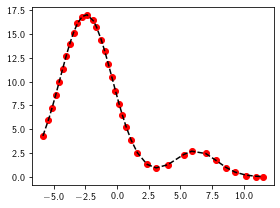

In [87]:
''' Costa et al. data comprise two overlapping Gaussians in log space'''
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(X_array, Y_array, "ro")
ax1.plot(X_array, _2gaussian(X_array, *popt_2gauss), 'k--')#,\
fig.tight_layout()


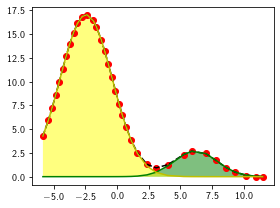

In [88]:
''' We can highlight each of the separate distributions '''

fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(X_array, Y_array, "ro")
ax1.plot(X_array, _2gaussian(X_array, *popt_2gauss), 'k--')

# peak 1
ax1.plot(X_array, gauss_peak_1, "g")
ax1.fill_between(X_array, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)
  
# peak 2
ax1.plot(X_array, gauss_peak_2, "y")
ax1.fill_between(X_array, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  
fig.tight_layout()

In [89]:
# this cell prints the fitting parameters with their errors
print("-------------Peak 1-------------")
print("amplitude = %0.2f (+/-) %0.2f" % (pars_1[0], perr_2gauss[0]))
print("center = %0.2f (+/-) %0.2f" % (pars_1[1], perr_2gauss[1]))
print("sigma = %0.2f (+/-) %0.2f" % (pars_1[2], perr_2gauss[2]))
print("area = %0.2f" % np.trapz(gauss_peak_1))
print("--------------------------------")
print("-------------Peak 2-------------")
print("amplitude = %0.2f (+/-) %0.2f" % (pars_2[0], perr_2gauss[3]))
print("center = %0.2f (+/-) %0.2f" % (pars_2[1], perr_2gauss[4]))
print("sigma = %0.2f (+/-) %0.2f" % (pars_2[2], perr_2gauss[5]))
print("area = %0.2f" % np.trapz(gauss_peak_2))
print("--------------------------------")


-------------Peak 1-------------
amplitude = 11.36 (+/-) 0.12
center = 6.22 (+/-) 0.02
sigma = 1.67 (+/-) 0.02
area = 12.67
--------------------------------
-------------Peak 2-------------
amplitude = 87.74 (+/-) 0.09
center = -2.43 (+/-) 0.00
sigma = 2.06 (+/-) 0.00
area = 255.37
--------------------------------


In [90]:
''' Converts Reckziegel data to array for calculations '''
X_array2 = np.array(reck_df["log"].values)
Y_array2 = np.array(reck_df["mass_frac"].values)

## guesstimated curve parameters
amp1 = 100
sigma1 = 10
cen1 = -8

In [107]:
''' As above, but we only need one curve '''
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((X_array2-cen1)/sigma1)**2)))


In [92]:
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, X_array2, Y_array2, p0=[amp1, cen1, sigma1])

perr_gauss = np.sqrt(np.diag(pcov_gauss))


#### The original data are binned, so we cannot extract much detail from them

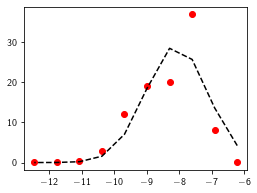

In [93]:
fig = plt.figure(figsize=(4,3))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(X_array2, Y_array2, "ro")
ax1.plot(X_array2, _1gaussian(X_array2, *popt_gauss), 'k--')#,\

In [97]:
''' As above, but redefined using interpolated data for unimodal data'''
def _1gaussian(x, amp1,cen1,sigma1):
    return amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((X_interp-cen1)/sigma1)**2)))


In [114]:
''' Interpolate x axis data '''
X_array1 = np.array(reck_df["phi"].values)#np.array(reck_df["log"].values)
Y_array = np.array(reck_df["mass_frac"].values)
X_interp=np.interp(np.arange(0, len(X_array1), .25), np.arange(0, len(X_array1)), X_array1)

In [115]:
Y_interp=np.interp(np.linspace(0, len(Y_array), len(X_interp)), np.arange(0, len(Y_array)), Y_array)

In [116]:
popt_gauss, pcov_gauss = scipy.optimize.curve_fit(_1gaussian, X_interp, Y_interp, p0=[amp1, cen1, sigma1])

perr_gauss = np.sqrt(np.diag(pcov_gauss))


ValueError: operands could not be broadcast together with shapes (10,) (40,) 

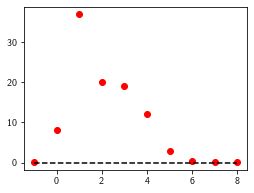

In [100]:
fig = plt.figure(figsize=(4,3))
ax1 = fig.add_subplot(gs[0])

ax1.plot(X_array1, Y_array, "ro")
ax1.plot(X_interp, _1gaussian(X_interp, *popt_gauss), 'k--')#,\

In [66]:
# this cell prints the fitting parameters with their errors
print("amplitude = %0.2f (+/-) %0.2f" % (popt_gauss[0], perr_gauss[0]))
print("center = %0.2f (+/-) %0.2f" % (popt_gauss[1], perr_gauss[1]))
print("sigma = %0.2f (+/-) %0.2f" % (popt_gauss[2], perr_gauss[2]))


amplitude = 69.54 (+/-) 11.77
center = -8.08 (+/-) 0.18
sigma = 0.95 (+/-) 0.19


In [67]:
''' Calculate mean and standard deviation for data of this study '''
log10_data = [np.log10(x) for x in size_data.meters]
log10mean = np.mean(log10_data)
mean = 10**log10mean
log10std = np.std(log10_data)
vals = [10**(log10mean+x*log10std) for x in [-2,-1,1,2]]

#### Plot size distribution of our studied particles alongside Total Grain Size Distributions of Reckziegel et al. and Costa et al.

In [68]:
''' Costa et al. binned data'''

costa_df = pd.read_csv("data/costa_data_bins.csv", names = ["bar", "wt%"])
costa_df["phi_centre"] = np.arange(-5.5, 12.5, 1) 
# costa_df = costa_df.sort_values(by="phi").reset_index()
# bona_df["mm"] = 0.5**bona_df["phi"]
# bona_df["m"] = 0.001*bona_df["mm"]
costa_df.head()

,bar,wt%,phi_centre
0,Bar0,6.388278,-5.5
1,Bar1,13.567766,-4.5
2,Bar2,14.798535,-3.5
3,Bar3,17.054945,-2.5
4,Bar4,15.443223,-1.5


Text(0, 0.5, 'TGSD [wt.\\%]')

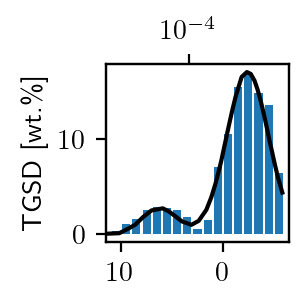

In [69]:
fig= plt.figure(1, figsize = mm2inch(30,30), dpi =200)
ax = fig.add_subplot(111)
ax.bar(np.arange(-5.5, 12.5, 1),
        costa_df["wt%"])
ax.set_xlim(11.5,-6.5)
ax2 = ax.twiny()
ax2.plot(bona_df.m, bona_df.frac, color = "k")
ax2.set_xscale("log")
ax2.set_xlim((0.5**11.5)*0.001, (0.5**-6.5)*0.001,)
ax.set_ylabel("TGSD [wt.\%]")

In [70]:
X_array1 = np.array(reck_df["phi"].values)#np.array(reck_df["log"].values)
Y_array = np.array(reck_df["mass_frac"].values)

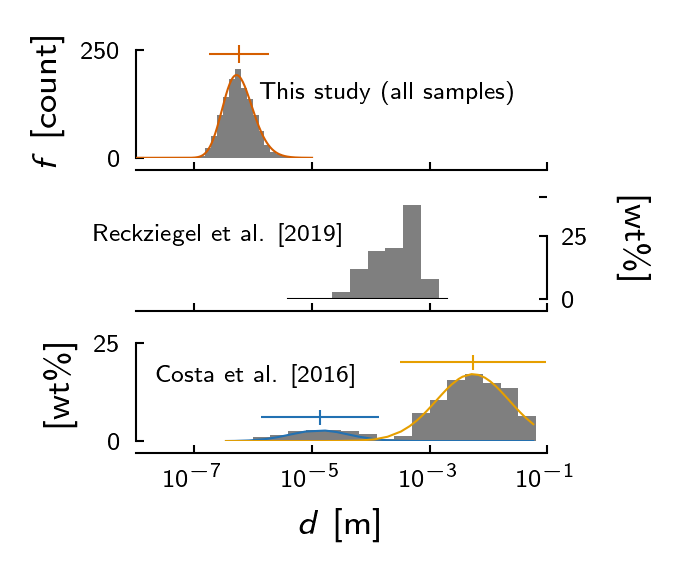

In [71]:

plt_params_sans()
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   #
       r'\sisetup{detect-all}',   # 
       r'\usepackage{sansmath}',  # 
       r'\sansmath'               # 
]
fig = plt.figure(1, mm2inch(45,45), dpi=300)
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

heights = [6,20]

ax3_ = ax3.twiny()
ax3_.bar(np.arange(-5.5, 12.5, 1),
        costa_df["wt%"], color = "k", ec= "k", width = 1, lw=0, alpha = .5)
ax3_.set_xticks([])

ax3_.set_xlim(m2phi(1e-8),m2phi(1e-1))
ax3.set_xscale("log")
ax3.set_xlim(1e-8, 1e-1)

ax3_.plot((X_array), gauss_peak_1, color=colors[0], lw=.5)
ax3_.plot((X_array), gauss_peak_2, color = colors[1], lw=.5)

for i, params in enumerate([pars_1, pars_2]):
    ax3.vlines(x = phi2m(params[1]), ymin = heights[i]-2, ymax = heights[i]+2,
          color = colors[i], lw =.5) ##348ABD
    ax3.hlines(y=heights[i], xmin=phi2m(params[1]+2*params[2]),
              xmax=phi2m(params[1]-2*params[2]),
              color = colors[i], lw =.5)
    
##########################################
ax2_ = ax2.twiny()   
ax2_.bar(reck_df.phi,
        reck_df["mass_frac"], color = "k", ec= "k", width = 1, lw=0, alpha = .5)
ax2_.set_xlim(m2phi(1e-8),m2phi(1e-1))
ax2.set_xscale("log")
ax2.set_xlim(1e-8, 1e-1)
##########################################
ax2_.plot(X_interp, _1gaussian(X_interp, *popt_gauss), 'k', lw=.5)
ax2_.hlines(y=40, xmin=(popt_gauss[1]-2*popt_gauss[2]),
           xmax=(popt_gauss[1]+2*popt_gauss[2]),
              color = "k", lw =.5)
ax2_.vlines(x = (popt_gauss[1]), ymin = 40*0.9, ymax = 40*1.1,
          color = "k", lw =.5)



##########################################
dataset = compiled_data.All.values[~np.isnan(compiled_data.All.values)]
ax1.hist(dataset, 
         bins = np.geomspace(phi2m(14), phi2m(-6), 61),
         density=False, color = "k", alpha = .5 )
ax1.set_xscale("log")
ax1.set_xlim(1e-8, 1e-1)

log_data = [np.log(x) for x in dataset]
param = lognorm.fit(log_data)
x = np.linspace(np.log(1e-8), np.log(1e-5), 200)
pdf_fitted = stats.lognorm.pdf(x, *param)
ax1.plot(np.exp(x), pdf_fitted*280, lw=.5,ls = "-" ,
        label="lognormal", zorder = 10, color = colors[3])

log10_data = [np.log10(x) for x in dataset]
log10mean = np.mean(log10_data)
mean = 10**log10mean
log10std = np.std(log10_data)
vals = [10**(log10mean+x*log10std) for x in [-2,-1,1,2]]
ax1.hlines(y=240, xmin=vals[0], xmax=vals[3],
              color = colors[3], lw =.5)
ax1.vlines(x = mean, ymin = 220, ymax = 260,
          color = colors[3], lw =.5)

##########################################
ax1.annotate("This study (all samples)", xy = (0.3, 0.5), xycoords = "axes fraction", fontsize = "xx-small")
ax2.annotate("Reckziegel et al. [2019]", xy = (-.1, 0.5), xycoords = "axes fraction", fontsize = "xx-small")
ax3.annotate("Costa et al. [2016]", xy = (0.05, 0.5), xycoords = "axes fraction", fontsize = "xx-small")

for i, ax in enumerate([ax1, ax2, ax3]):
    
#     ax.set_xscale("log") 
#     ax.set_ylim(0.7,1.15)
#     ax.set_yticks([])
    for spine in ["top", "left", "right"]:
        ax.spines[spine].set_visible(False)
        ax3_.spines[spine].set_visible(False)
    ax.spines["bottom"].set_linewidth(0.5)
    ax3_.spines["bottom"].set_visible(False)


    ax.set_xlim(1e-8, 1e-1)
    if i <= 1:
        ax.set_xticks([])
    else:
        ax.set_xlabel(r"$d$ [m]", fontsize = "small")
        ax.set_xticks([1e-7, 1e-5, 1e-3, 1e-1])
        ax.tick_params(which="minor", direction = "in", length = 2, width = .5)
for spine in ["top", "left", "right","bottom"]:
    ax2_.spines[spine].set_visible(False)

for ax in [ax1,ax3]:
    ax.spines["left"].set_visible(True)
    ax.spines["left"].set_linewidth(0.5)
    ax.tick_params(which="both", direction = "in", length = 2, width = .5)
ax2_.spines["right"].set_visible(True)
ax2_.spines["right"].set_linewidth(0.5)
ax2.yaxis.tick_right()
ax2.tick_params(which="both", direction = "in", length = 2, width = .5)


ax1.spines["left"].set_bounds(0,250)
ax1.spines["bottom"].set_position(("axes", -0.1))

ax2_.spines["right"].set_bounds(0,25)
ax2.spines["bottom"].set_position(("axes", -0.1))

ax3.spines["left"].set_bounds(0,25)
ax3.spines["bottom"].set_position(("axes", -0.1))

ax1.set_ylabel("$f$ [count]", fontsize = "small")
ax3.set_ylabel("[wt\%]", fontsize = "small")
ax2.set_ylabel("[wt\%]", fontsize = "small", rotation = 270, labelpad=15)
ax2.yaxis.set_label_position("right")

ax3.tick_params(axis='both', which='major', labelsize=6)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(axis='y', which='major', labelsize=6)    
    
for ax in [ax1,ax2]:
    
    ax.set_xticks([1e-7, 1e-5, 1e-3, 1e-1])
    ax.tick_params(direction = "in", length = 2, width = .5)
    ax.xaxis.set_ticklabels([])

ax2_.set_xticks([])
for ax in [ax3, ax3_]:
    ax.set_facecolor("none")
    ax.set_ylim(0,30)
ax3.set_yticks([0,25])
ax1.set_yticks([0,250])


# plt.savefig("fig5_inset.pdf", bbox_inches='tight')
plt.show()

**Figure 4 A grain size fractionation model for Cordón Caulle volcano.** a Compiled data in this study reflect a captured in-conduit fine ash fraction, characterised by a mean diameter $d$ of 9.94 $\times$10$^{-7}$ m. Distribution assumed by Reckziegel et al. [ref. 30] are approximately unimodal and described by mean of $d$ = 3.10 $\times$10$^{-4}$ m. Data of Costa et al. [ref. 29], reconstructed from field data, are bimodal, described by lognormal peaks at $d$ = 1.34 $\times$10$^{-5}$ and $d$ = 5.39 $\times$10$^{-3}$ m. Mean and $\pm 2\sigma$ range are highlighted for data of this study and ref. 30; these values are shown for each of the peaks of ref. 29. Note different bin size and y axes between panels. 
***
Panels b and c are not shown in this notebook.
***